## Prediction using Unsupervised ML (KMeans Clustering)

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans

# An ideal way to figure out the right number of clusters would be to calculate 
# the Within-Cluster-Sum-of-Squares (WCSS)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0) # using default
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    # Inertia: It is the sum of squared distances of samples to their closest cluster center.

# Range is taken of 1-10 clusters to check the optimum cluster to apply KMeans.

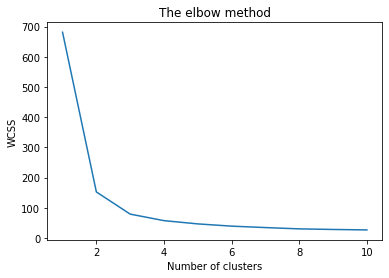

In [11]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [17]:
# The optimum clusters is where the elbow occurs. 
# This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
# We choose 3 here.

# Applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


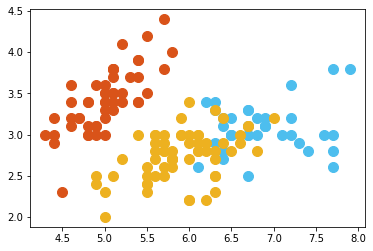

In [33]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = '#4DBEEE', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = '#D95319', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = '#EDB120', label = 'Iris-virginica')

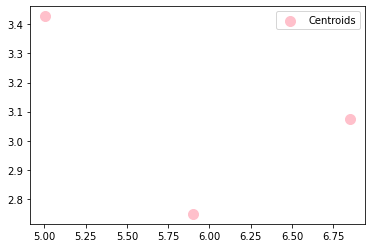

In [34]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'pink', label = 'Centroids')

plt.legend()

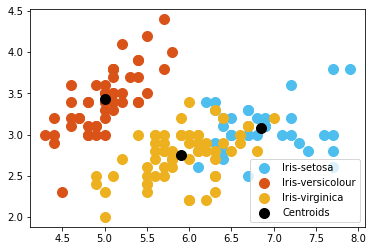

In [39]:
# Visualising the clusters and plotting the centeroids on same chart.
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = '#4DBEEE', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = '#D95319', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = '#EDB120', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [41]:
# Adding predictions to dataset
data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

            Cluster  
0  Iris-versicolour  
1  Iris-versicolour  
2  Iris-versicolour  
3  Iris-versicolour  
4  Iris-versicolour  


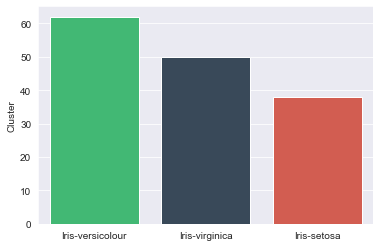

In [43]:
# Cluster distribution 

import seaborn as sns
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["#2ecc71", "#34495e", "#e74c3c"]));

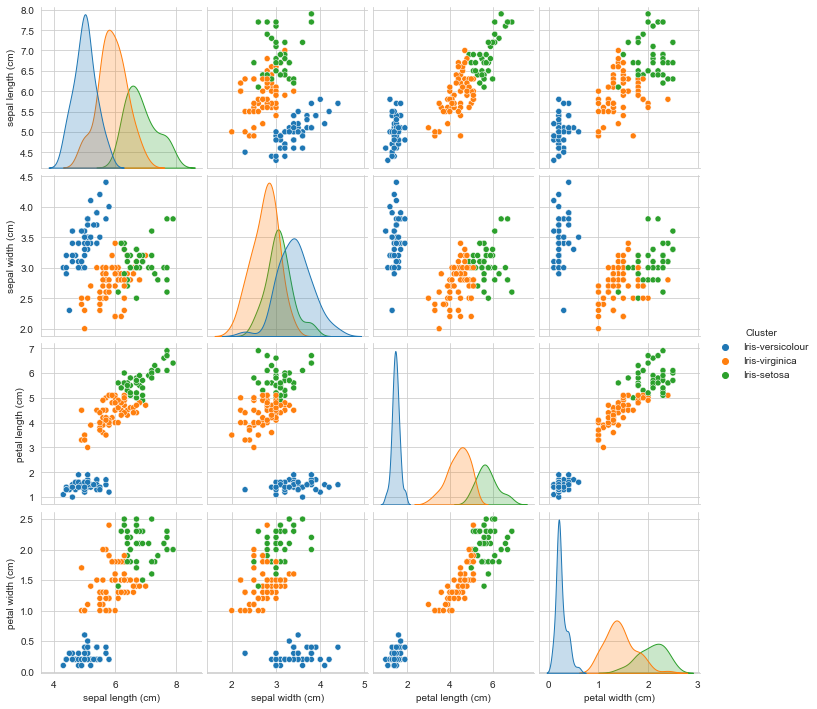

In [46]:
sns.set_style('whitegrid')   ### Sets grid style
sns.pairplot(data_with_clusters,hue = 'Cluster');

# Pair-plot insights
1) Petal-length and petal-width seem to be positively correlated(seem to be having a linear relationship).
2) Iris-Setosa seems to have smaller petal length and petal width as compared to others.
3) Looking at the overall scenario, it seems to be the case that Iris-Setosa has smaller dimensions than other flowers.

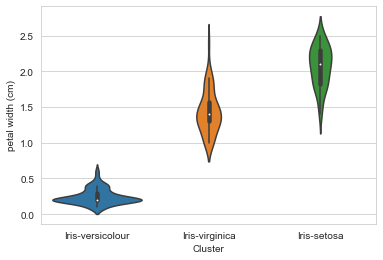

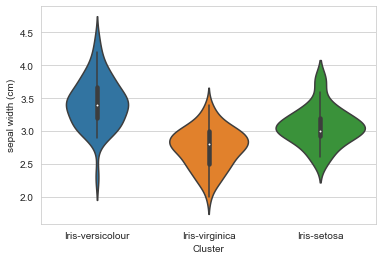

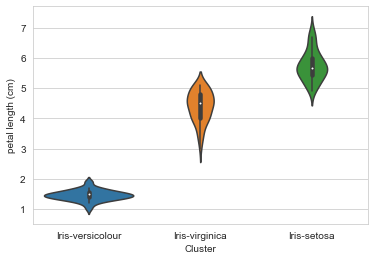

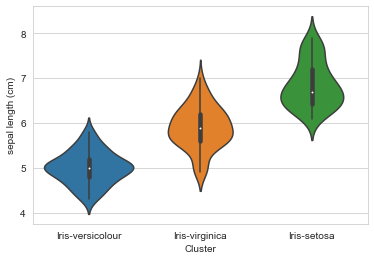

In [47]:
sns.violinplot(x="Cluster",y="petal width (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="sepal width (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="petal length (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="sepal length (cm)",data=data_with_clusters)
plt.show()